# Gerrits gelijk
Bij Nieuws en Co op radio 1 melde ik gisteren dat hoewel het gemiddeld over een jaar niet meer regende, er vooral meer hevige buien zijn: de buien die overstromingen veroorzaken.

Toen ik de studio uitliep en op Twitter keek had weerman Gerrit Hiemstra direct gereageerd: de gemiddelde hoeveelheid regen neemt wel degelijk toe! Hij liet daarbij de in [deze tweet](https://twitter.com/GerritHiemstra/status/1001180991623491585) het kaartje zien met het verschil in jaar-gemiddelde tussen de periode 1951-1980 en 1980-2010. 

Oops: typisch geval van blinde vlek aan mijn kant. Voor overstromingen zijn de pieken, niet het jaargemiddelde van belang. Ik had onthouden dat de pieken waren toegenomen, maar had me moeten realiseren dat ik veel minder zeker wist of het gemiddelde ook omhoog was gegaan. Gerrit weet dat natuurlijk als meteoroloog wel.

Om mezelf wat meer gevoel bij de KNMI gegevens te geven ben ik op hun website gaan spitten en wat blijkt: je kan direct vanuit de programmertaal Python, waar ik veel mee werk, KNMI data inladen. Dat doe ik in onderstaande python notebook.

### Benodigde libraries
Allereerst laden we de KNMI library in, plus een aantal standaard libraries voor het omgaan met gegevens (pandas en numpy) en het afbeelden van gegevens (matplotlib).

Tevens printen we een lijst met alle KNMI stations, zodat we daarna kunnen kiezen voor welk station we de gegevens willen bekijken.

In [1]:
import knmi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print(knmi.stations)

{257: Station(number=257, longitude=4.603, latitude=52.506, altitude=8.5, name='WIJK AAN ZEE'), 258: Station(number=258, longitude=5.401, latitude=52.649, altitude=7.3, name='HOUTRIBDIJK'), 260: Station(number=260, longitude=5.18, latitude=52.1, altitude=1.9, name='DE BILT'), 263: Station(number=263, longitude=5.177, latitude=52.101, altitude=2.0, name='DE BILT (TEST)'), 8: Station(number=8, longitude=5.528, latitude=52.453, altitude=-4.2, name='LELYSTAD'), 265: Station(number=265, longitude=5.274, latitude=52.13, altitude=13.9, name='SOESTERBERG'), 266: Station(number=266, longitude=5.338, latitude=53.07, altitude=3.0, name='KORNWERDERZAND'), 267: Station(number=267, longitude=5.384, latitude=52.898, altitude=-1.3, name='STAVOREN'), 268: Station(number=268, longitude=5.436, latitude=52.531, altitude=999.9, name='HOUTRIB'), 13: Station(number=13, longitude=3.314, latitude=47.975, altitude=999.9, name='WISSEKERKE ???'), 270: Station(number=270, longitude=5.752, latitude=53.224, altitude

### kiezen stationnummer
Uit de lijst hierboven kies ik station 210: Valkenburg. Die ligt dicht bij de overstroomde gebieden in Limburg

In [10]:
stationNummer = 210

### inladen data
Vervolgens laad ik de data in, ik kies voor de periode 1951-heden. Ik print voor de zekerheid ook de KNMI disclaimer uit.

In [11]:
df = knmi.get_day_data_dataframe(stations=[stationNummer], start="19510101", end="20180528")
print(df.disclaimer)


BRON: KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI)
Opmerking: door stationsverplaatsingen en veranderingen in waarneemmethodieken zijn deze tijdreeksen van dagwaarden mogelijk inhomogeen! Dat betekent dat deze reeks van gemeten waarden niet geschikt is voor trendanalyse. Voor studies naar klimaatverandering verwijzen we naar de gehomogeniseerde reeks maandtemperaturen van De Bilt <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/gehomogeniseerde-reeks-maandtemperaturen-de-bilt> of de Centraal Nederland Temperatuur <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt>.


/Users/rwhut/anaconda/lib/python3.5/site-packages/knmi/knmi.py:100: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.legend = legend
/Users/rwhut/anaconda/lib/python3.5/site-packages/knmi/knmi.py:101: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.stations = stations


### bewerken en selecteren data
Uit de KNMI gegevens kies ik totale hoeveelheid regen (RH). Die deel ik door 10 omdat het standaard in "tiende millimeters" genoteerd wordt. Ik maak alle negatieve getallen gelijk aan nul en split de data op in drie verschillende stukken: 1951-1980, 1981-2010 en 2010-heden

In [12]:
rain=df['RH']/10
rain[rain<0]=0;
rainOld=rain[(rain.index >= '1951') & (rain.index < '1980') & pd.notna(rain)]
rainNew=rain[(rain.index >= '1980') & (rain.index < '2010') & pd.notna(rain)]
rainLatest=rain[(rain.index >= '2010') & (rain.index < '2019') & pd.notna(rain)]

### Gerrits gelijk: gemiddelde
Hier reken ik per periode uit wat de gemiddelde hoeveelheid regen per jaar is. Daar zie je inderdaad een flinke stijging!

Maar ik wil natuurlijk ook even weten hoe het met de hoosbuien zit, dus we gaan nog even door.

In [23]:
print("1951-1980: " + str(rainOld.sum(axis=0)/(len(rainOld)/365)) + " mm per jaar")
print("1981-2010: " + str(rainNew.sum(axis=0)/(len(rainNew)/365)) + " mm per jaar")
print("2011-heden: " + str(rainLatest.sum(axis=0)/(len(rainLatest)/365)) + " mm per jaar")

1951-1980: 726.286147804 mm per jaar
1981-2010: 835.333044351 mm per jaar
2011-heden: 844.295159896 mm per jaar


### x-assen
Hier maak ik assen aan die van 1 tot nul lopen en precies even lang zijn als de regen-data selecties. Hiermee kan ik hieronder cummulatieve verdelingen plotten.

In [24]:
xOld=np.arange(1,0,-1/len(rainOld))
xNew=np.arange(1,0,-1/len(rainNew))
xLatest=np.arange(1,0,-1/len(rainLatest))


### meer plensbuien?
Vervolgens sorteer ik de regendata op volgorde van intensiteit en plot dat langs de gemaakte assen. Je krijgt dan zogenaamde "cummulatieve verdelingen". Als je op de x-as bij 5 mm omhoog gaat komt je als eerst de zwarte lijn van de periode 1951-1980 tegen, rond de 60 dagen, op de Y-as. Dat betekend dat in de periode 1951-1980 het gemiddeld 60 dagen per jaar meer dan 5 mm regende. De lijnen voor de periodes 1981-2010 en 2011-heden liggen allebei hoger: er zijn dus tegenwoordig meer dagen per jaar waarin het meer dan 5 mm per dag regent.

Deze grafiek laat zien dat het inderdaad vaker plenst, gelukkig dat ik dat wel goed onthouden had.

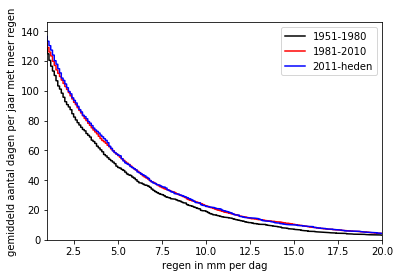

In [26]:
plt.plot(rainOld.sort_values(),xOld*365,'k',rainNew.sort_values(),xNew*365,'r',rainLatest.sort_values(),xLatest*365,'b')
plt.xlim(1,20)
plt.ylim(0,0.4*365)
plt.xlabel('regen in mm per dag')
plt.ylabel('gemiddeld aantal dagen per jaar met meer regen')
plt.legend(['1951-1980','1981-2010','2011-heden'])
